In [246]:
import pandas as pd
df_original=pd.read_csv("./data/data.csv")
print(df_original.head())

  Country Maker/Brand       Type Group_Segment Segment    2014    2015  \
0   Japan      Toyota  Mini Cars     Passenger       A   23148   18812   
1   Japan      Toyota       Cars     Passenger       A       0       0   
2   Japan      Toyota       Cars     Passenger       A       0       0   
3   Japan      Toyota       Cars     Passenger       A    2342     801   
4   Japan      Toyota       Cars     Passenger       B  286270  265426   

     2016    2017    2018    2019   2020   2021   2022   2023 Region    Total  
0   21208   22158   25184   24076  17892  17653  15116  10354   Asia   195601  
1       0       0       0       0      0    520   1106    425   Asia     2051  
2       0       0       0     679   1670   1415   2020   1451   Asia     7235  
3     143       0       0       0      0      0      0      0   Asia     3286  
4  197156  146129  137626  110647  71465  77266  68951  78927   Asia  1439863  


In [247]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

## Figure 1

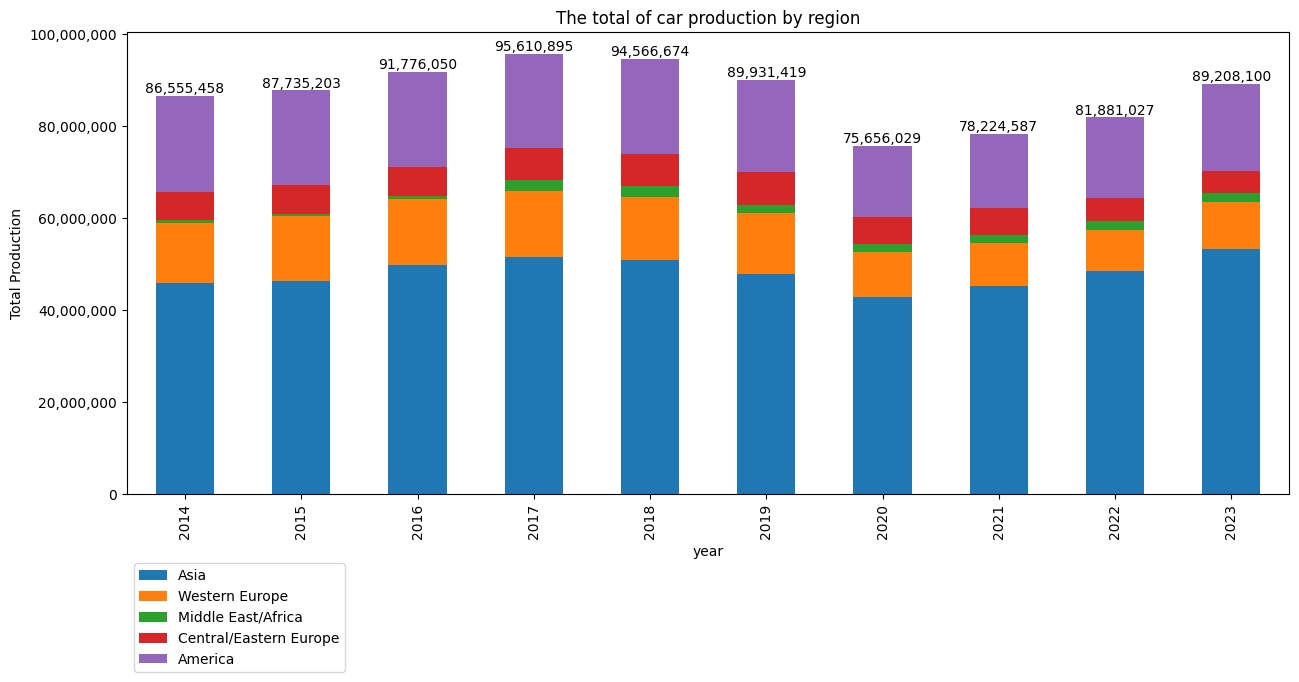

In [248]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)] 
plt.style.use('tableau-colorblind10')
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()

for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)

colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",] 
# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='The total of car production by region',figsize=(15, 6), color=colors)
plt.ylabel("Total Production")
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))
my_path = os.path.abspath("./figure")  
my_file = 'figure1_car_production_by_region.png'

plt.savefig(os.path.join(my_path, my_file),bbox_inches='tight')        


# Figure 2

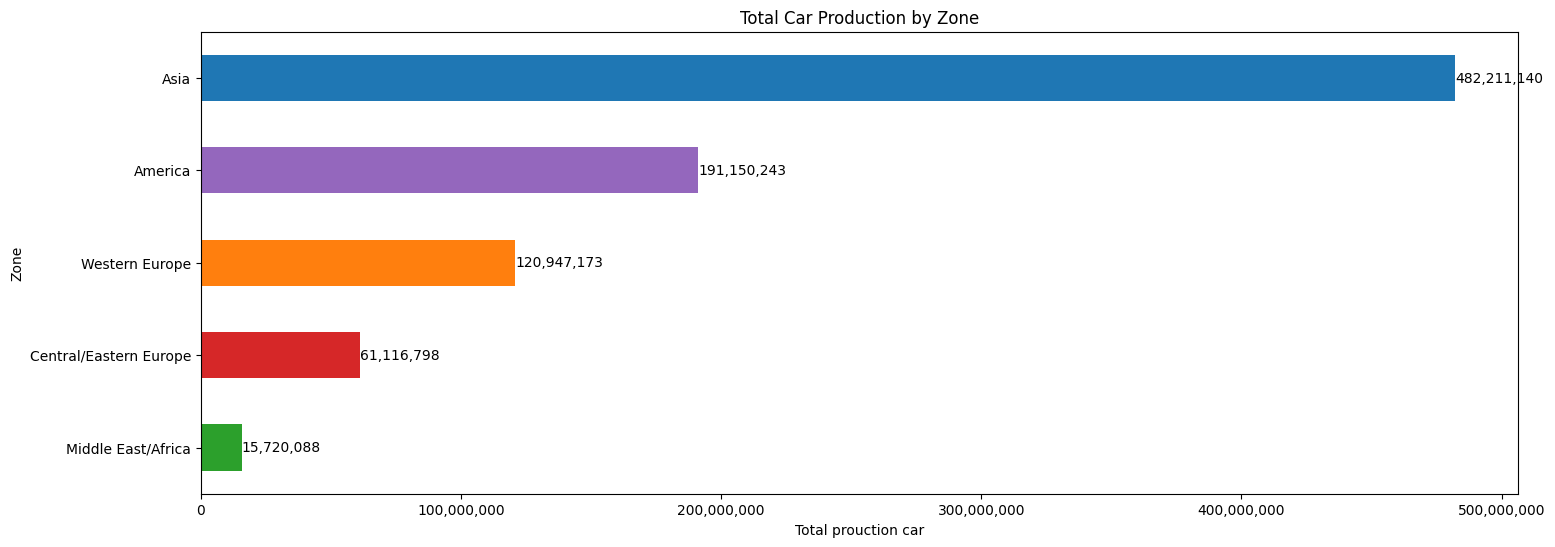

In [249]:
import matplotlib.pyplot as plt
import os
 
regions = df_original["Region"].unique()

total = df_original.groupby("Region")["Total"].sum().sort_values(ascending=True)
 
colors=["tab:green", "tab:red", "tab:orange","tab:purple","tab:blue"] 
ax = total.plot(kind='barh', title='Total Car Production by Zone', figsize=(17, 6),color=colors)
 
plt.xlabel("Total prouction car")
plt.ylabel("Zone")

for container in ax.containers[:]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
my_path = os.path.abspath("./figure")
my_file = 'figure2_car_production_by_zone.png'
plt.savefig(os.path.join(my_path, my_file))        
 

# Figure 3

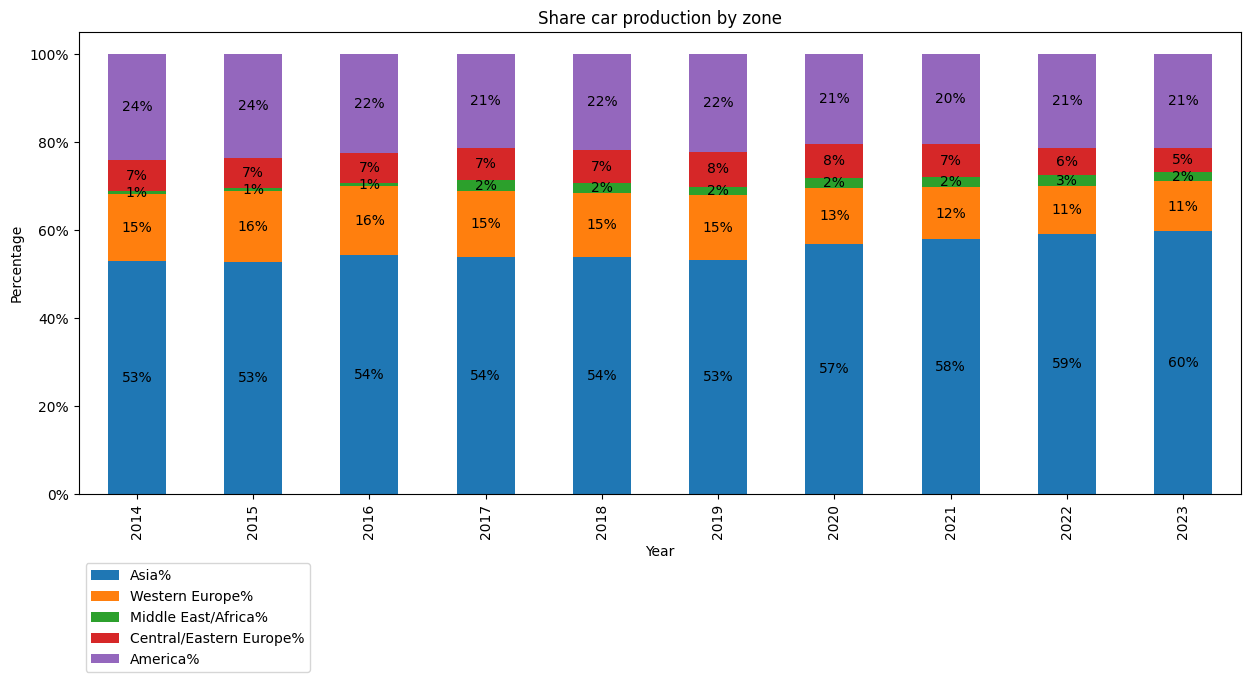

In [272]:
import matplotlib.pyplot as plt
import os
 
import numpy as np

years = [i for i in range(2014,2024)]  
transformed_data = {
    "year": years,
}

regions = df_original["Region"].unique()

new_data = {
    
}
percentage_column_name = []
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    new_data[str(region)+"%"]=[]
    percentage_column_name.append(str(region)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)
        
 
df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year') 
df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1) 
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",] 
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6))
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Share car production by zone") 

my_path = os.path.abspath("./figure")
my_file = 'figure3_car_production_by_zone_percentage.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')       


# Figure 4

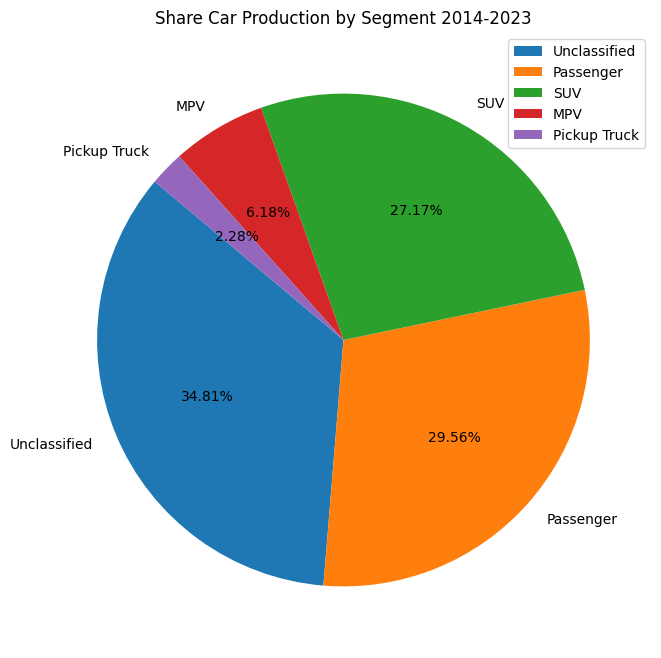

In [276]:
import matplotlib.pyplot as plt

 
data  = df_original["Group_Segment"].value_counts()
labels = data.index.tolist()  
sizes = data.values.tolist() 
 
fig, ax = plt.subplots(figsize=(8, 8))
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",]
# ax.pie(data["Group_Segment"], labels=labels, autopct='%1.1f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title("Share Car Production by Segment 2014-2023")
plt.legend(labels, loc="upper right")


my_path = os.path.abspath("./figure")
my_file = 'figure4_share_car_production_by_segment_2014-2023.png'
plt.savefig(os.path.join(my_path, my_file))  

# Back up

In [ ]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

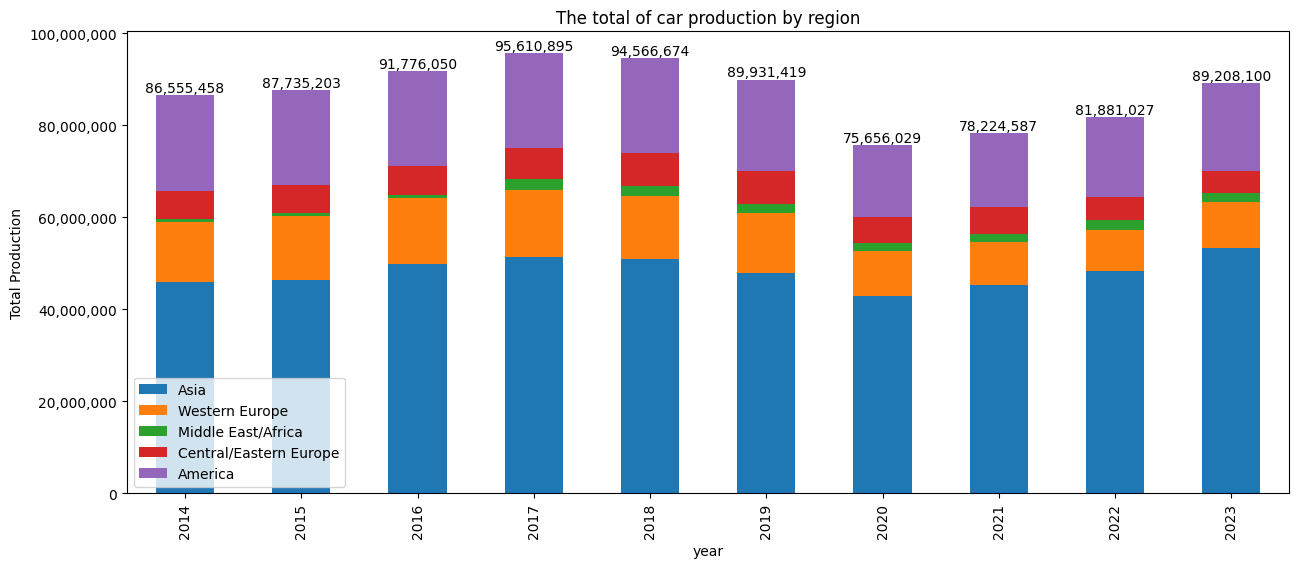

In [ ]:
import matplotlib.pyplot as plt
years = [i for i in range(2014,2024)]

# Create an empty dictionary to store the results
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()

 
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)

# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='The total of car production by region',figsize=(15, 6))
plt.ylabel("Total Production")
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


## Figure 5